# Exploring Life Expectancy with Regression Analysis

In this notebook we'll attempt to build an ideal model to explore what factors influences life expectancy.  I'm hoping to use this project as a Python (and packages like pandas and seaborn) and regression analysis refresher.  Some of the questions I hope to answer during this analysis are:

* Are any of the attributes useful in explaining the Life Expectancy?
* If so, which of the attributes are useful?  Are they all useful or only a subset?
* How well does the model fit the data?
* Can we get an estimate of the impact any useful attribute will have on Life Expectancy?

---

## Data 

The data used in this analysis comes from the World Bank and World Health Organization.  The source of the data and further information can be found on Kaggle located [here](https://www.kaggle.com/kumarajarshi/life-expectancy-who)


In [744]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

Here we just import the necessary packages needed for this analysis.  Pandas for reading in our data, storing it as a Pandas dataframe, and performing data manipulation as needed.  Seaborn for statistical data visualizations.  Matplotlib.pyplot for extra plotting handle.  We then set our plots to have the default seaborn theme and color palette.

In [745]:
data = pd.read_csv("data/Life Expectancy Data.csv")
print(data.dtypes)
data.head()

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  10-19 years             float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Here we just read the data into a pandas dataframe, see the data types and use the head method to get a preview of the data we will be working with.  In the first section we see that some of the column names have leading white space.  Just to avoid any trouble down the road we can strip all leading and trailing white space for all column names.  I also decided at this point to change the status column into a dummy variable, so it'll be easier to fit a regression model.

In [746]:
data.rename(columns=lambda name: name.strip().title(), inplace=True)
data = data.replace(['Developed','Developing'], [1, 0])

Here is a brief description of each of the columns. A more detailed explanation can be found on the Kaggle site linked above.

* __Country__ - Country name
* __Year__ - Year         
* __Status__ - Development status (1 = Developed; 0 = Developing)        
* __Life Expectancy__ - Life expectancy in age       
* __Adult Mortality__ - Adult mortality rates/ Probability of dying between 15 and 60 (per 1000 population)
* __Infant Deaths__ - Infant death rates (per 1000 population)
* __Alcohol__ - Alcohol consumption
* ~~__Percentage Expenditure__ - Funds spent on health as a % of GDP per capita~~  
* __Hepatitis B__ - Hepatitis B immunization coverage (%) among 1-year olds                   
* ~~__Measles__ - Measles confirmed cases (per 1000 population)~~      
* ~~__Bmi__ - Average BMI of the population~~                
* __Under-Five Deaths__ - Deaths among 5-year old’s and younger (per 1000 population)
* __Polio__ - Polio immunization coverage (%) among 1-year old’s        
* __Total Expenditure__ - General government funds spent on health as a % of total expenditure            
* __Diphtheria__ - Diphtheria immunization coverage (%) among 1-year olds 
* __Hiv/Aids__ - Deaths from HIV/AIDS per 1000 births among 0-4 year olds           
* __Gdp__ - Gross Domestic Product per capita (USD)                     
* __Population__ - Population of country              
* __Thinness  10-19 Years__ - Percentage of thinness (underweight) among 10-19 year olds.      
* __Thinness 5-9 Years__ - Percentage of thinness (underweight) among 5-9 year olds.           
* __Income Composition of Resources__ - Human Development Index in terms of income composition of resources
* __Schooling__ - Average number of years of schooling


_Updated Variable Definition_
* **Measles** - % of children ages 12-23 months who have received the measles immunization.
* **Bmi** - Prevalence of overweight among adults, BMI ≥ 25, age-standardized.
* **Per Capita Expenditure** - Current health expenditure per capita (USD)

Before we actually dive into the analysis portion of this project, it's best we get some summary statistics of the data to ensure that there is nothing that immediately sticks out.


In [747]:
data.describe()

,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,Bmi,...,Polio,Total Expenditure,Diphtheria,Hiv/Aids,Gdp,Population,Thinness 10-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling
count,2938.000000,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,0.174268,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,0.379405,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,0.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,0.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,0.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,...,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Looking at the summary data we can already see some inconsistencies. Many of the columns have different counts meaning there is missing data we're going to need to do something about.  In infant deaths we see that the max value listed is 1800 which doesn't make sense since we're working with per 1000 population data.  We see a similar situation with the Measles, Under-5 deaths, and Percentage Expenditure.  I'm also skeptical about the 50th percentile of average BMI being 43.5.  Before we continue, we're going to have to find out if these are errors and if so, how should we deal with them.  

In [748]:
data[['Country', 'Year', 'Infant Deaths']].loc[data['Infant Deaths'] >= 500]

,Country,Year,Infant Deaths
1186,India,2015,910
1187,India,2014,957
1188,India,2013,1000
1189,India,2012,1100
1190,India,2011,1100
1191,India,2010,1200
1192,India,2009,1300
1193,India,2008,1300
1194,India,2007,1400
1195,India,2006,1500


I chose 500 because any country with numbers greater than that seem like obvious errors.  We find out that Nigeria and India are the countries that purportedly have an infant death rate greater than 500.  When checking with a reputable outside source, in this case the [World Bank Group](https://data.worldbank.org/indicator/SP.DYN.IMRT.IN?end=2015&locations=NG-IN&start=2000&view=chart&year_high_desc=false), we find that these numbers are incorrect, so we need to replace them.

In [749]:
import wbdata
from datetime import datetime
import numpy as np
from data.life_expectancy_data import *

indicators = {
    'SH.DYN.MORT': 'Under-Five Deaths',
    'SP.DYN.IMRT.IN': 'Infant Deaths',
    'SH.IMM.MEAS': 'Measles',
    'SH.XPD.CHEX.PC.CD': 'Per Capita Expenditure',
    'SH.XPD.CHEX.GD.ZS': 'Total Expenditure',
    'SP.DYN.LE00.IN': 'Life Expectancy'
}

dates = (datetime.strptime('2000', '%Y'), datetime.strptime('2015', '%Y'))

data_1 = wbdata.get_dataframe(country='all', indicators=indicators,
                             data_date=dates)

data_1.rename(replacement_names, level=0, inplace=True)
data_1.reset_index(inplace=True)
data_1.rename(index=str, inplace=True, columns={'country': 'Country',
                                                'date': 'Year'})
data.rename(index=str, inplace=True, columns={'Percentage Expenditure': 'Per Capita Expenditure'})
data_1['Year'] = data_1['Year'].astype(np.int64)

data.set_index(['Country', 'Year'], inplace=True)
data_1.set_index(['Country', 'Year'], inplace=True)
data.update(data_1)

Here I get the data from the wbdata package, which acts as a wrapper for the World Bank's Indicator API and place it into a dataframe.  I assume if India/Nigeria's values in the Under-5 deaths, Infant deaths, and Percentage Expenditure columns are incorrect, then there are many others that are incorrect.  So, to err on the side of caution, I download all of the countries' data and update our working dataframe.  I also change the names of a few countries to make sure the dataframe updates properly.  The country names which were changed can be found in the data directory.

A few things to note: 

* The Measles column has been replaced.  It no longer reflects confirmed measles cases (per 1000 population).  The updated column is now:
  * **Measles** - % of children ages 12-23 months who have received the measles immunization.
  
  
* After doing a little bit of research I believe that the BMI column is supposed to represent the percentage of total population who have a BMI greater than 25 (overweight) rather than the average BMI.  The values in this column are close enough to the estimates provided by the [WHO](http://apps.who.int/gho/data/view.main.CTRY2430A) so the updated column definition is:
  * **BMI** - Prevalence of overweight among adults, BMI ≥ 25, age-standardized.
  
  
* I'm opted not to use the Percentage Expenditure column defined in the original dataset. I've replaced it with Current Expenditure which is defined as:
  * **Per Capita Expenditure** - Current health expenditure per capita (USD)
 

Now it's time to deal with the missing values. Some ways I can think of to deal with the missing data would be:

* _Complete case analysis_ - meaning we drop any observation with NaN values.


* _Imputation_ - meaning we replace NaN with either mean, median, mode  or some other value.


* Use  a machine learning algorithm which can work with missing data.

One of the purposes of this project was to use this as a regression analysis refresher so that leaves me with the first 2 options.  Before deciding on how to deal with it, I decide to check what we would be left with if we dropped all of the observations with missing data.


In [750]:
dropped_data = data.dropna()
print(1 - (len(dropped_data.index)/len(data.index)))

0.4387338325391422


Looks like dropping all of the observations with missing data will leave us with ~44% of our  original data!  I'm not comfortable with losing that much data so I'm left with replacing these values.  Before deciding on how I can replace these values, it's best to see exactly how the data is missing.  Is the data:

* *Missing Completely at Random* - Meaning there is no pattern or relationship that makes some values more likely to be missing than others.


* *Missing at Random* - Meaning there is some systemic relationship or structure between the missing values and the observed data.


* *Missing Not at Random* - Meaning that the reason the value is missing is related to the value itself.

Looking at a subset of our dataframe with `data[data.isnull().any(axis=1)]` we can see that the missing data is missing completely at random.  Some missing completely at random properties that seem to stick out is how certain values are missing for a certain country in a couple of years but present in other years (e.g. Hepatitis B rates in Algeria).  It doesn't seem to me that whether or not a data value is missing, is conditional on other variables.  This means we're free to use the [Multiple Imputation by Chain Equations (MICE)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/) method to deal with our missing data.

The MICE documentation states that all relationships that are going to be investigated need to be included in the imputation model, so I'll include all variables in the formula.


In [751]:
from statsmodels.regression.linear_model import OLS
from statsmodels.imputation.mice import MICE, MICEData

impdata = MICEData(data)

formula = 'Life Expectancy = Status + Adult Mortality + Infant Deaths + '\
          'Alcohol + Percentage Expenditure + Hepatitis B + Measles + Bmi + '\
          'Under-Five Deaths + Polio + Total Expenditure + Diphtheria + '\
          'Hiv/Aids + Gdp + Population + Thinness  10-19 Years + '\
          'Thinness 5-9 Years + Income Composition Of Resources + Schooling'

mice = MICE(formula, OLS, impdata)

mice.data.data.set_index(data.index, inplace=True)
data.update(mice.data.data)
data.isnull().sum().sum()

data = data.groupby(level=[0]).mean()

data =  data.loc[data['Life Expectancy'] >= 38]

So now our working dataframe has no missing values!  One quick check of our data with `data.describe()` shows that we don't have any values that immediately stick out.  Here we also collapsed the dataframe so that now each observation is a unique country instead of a unique country/year and we can avoid any autocorrelation.  Now we can finally move into the analysis portion of this project.

When building our model, it is important to check that certain assumptions are met.  This means that we should verify that:

* A linear relationship exists between our response and predictor variables.


* Heteroscedasticity, meaning the residuals should have a constant variance.


* No multicollinearity exists among our predictor variables


* The residuals are normally distributed with mean 0.


* The residual values are independent of each other.


* Influential points (outliers or points with high leverage) have been identified and dealt with appropriately.


First, we'll ensure that the linearity condition is met.  In order to check the linearity condition in a multiple regression setting, we can create a preliminary model and plot the residuals against the fitted values.  If we notice any distinct patterns or trends, we can assume that there is 1 or more non-linear relationship between our response and predictor variables.


In [752]:
r_vars = ['Life Expectancy']

p_vars = ['Status','Adult Mortality', 'Infant Deaths', 'Alcohol',
          'Per Capita Expenditure', 'Hepatitis B', 'Measles', 'Bmi',
          'Under-Five Deaths', 'Polio', 'Total Expenditure', 'Diphtheria',
          'Hiv/Aids', 'Gdp', 'Population', 'Thinness  10-19 Years',
          'Thinness 5-9 Years', 'Income Composition Of Resources', 'Schooling']
model_1 = OLS(data[r_vars], data[p_vars]).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life Expectancy   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1023.
Date:                Mon, 08 Apr 2019   Prob (F-statistic):          1.00e-159
Time:                        15:03:19   Log-Likelihood:                -597.95
No. Observations:                 183   AIC:                             1234.
Df Residuals:                     164   BIC:                             1295.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Status                              0.5994      2.071      0.289      0.773      -3.490       4.689
Adult Mortality                     0.0053      0.011      0.476      0.635      -0.017       0.027
Infant Deaths                       0.1313      0.130      1.009      0.314      -0.126       0.388
Alcohol                             0.1338      0.212      0.630      0.530      -0.286       0.553
Per Capita Expenditure              0.0021      0.001      2.296      0.023       0.000       0.004
Hepatitis B                        -0.0189      0.026     -0.714      0.476      -0.071       0.033
Measles                             0.4320      0.095      4.531      0.000       0.244       0.620
Bmi                                 0.3108      0.051      6.038      0.000       0.209       0.412
Under-Five Deaths                   0.0153      0.079      0.194      0.846      -0.140       0.171
Polio                               0.0897      0.114      0.785      0.434      -0.136       0.315
Total Expenditure                  -0.0371      0.300     -0.124      0.902      -0.630       0.556
Diphtheria                         -0.0236      0.100     -0.237      0.813      -0.221       0.174
Hiv/Aids                           -0.8120      0.162     -5.020      0.000      -1.131      -0.493
Gdp                              -8.83e-05      0.000     -0.844      0.400      -0.000       0.000
Population                      -7.969e-09   1.69e-08     -0.472      0.638   -4.13e-08    2.54e-08
Thinness  10-19 Years              -0.0095      0.739     -0.013      0.990      -1.468       1.449
Thinness 5-9 Years                  0.6124      0.733      0.836      0.405      -0.835       2.060
Income Composition Of Resources    14.9016      6.121      2.434      0.016       2.815      26.988
Schooling                          -0.1371      0.336     -0.408      0.684      -0.800       0.526
==============================================================================
Omnibus:                       54.813   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.313
Skew:                           1.109   Prob(JB):                     3.53e-46
Kurtosis:                       7.747   Cond. No.                     4.41e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.41e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

So far in our preliminary model:

R-squared is defined as $1 - \dfrac{SSE}{SST}$ where SSE is the Sum of Squared Errors and SST is the Total Sum of Squares.  Our R-squared value of .966 means that ~96% of the variance in Life Expectancy can be explained by our predictor variables.
___
Our F test statistic is 259, meaning that this model is useful.  We can determine this by conducting a hypothesis test.  Our hypothesis test can be set up as follows:
 
 * $H_0: b_1 = b_2 =\:...\: = b_{19} = 0$
 * $H_a:$ At least one $b\neq$ 0.

Our null hypothesis states that none of the independent variables contribute any explanatory power to our model whereas the alternative hypothesis states that at least one does.  The p-value here is the likelihood that we would observe this $F$-statistic assuming that our null hypothesis is true (Area under $F^{\mathrm{19}}_{173}$ to the right of our $F$-statistic).  Our significance level or $\alpha$ is set at 0.05.  Our $\alpha$ is just the probability of getting a Type 1 error/False positive.  Since the p-value is lower than our alpha, we can reject our null hypothesis in favor of the alternative.  This means that this model has some explanatory power.

___
AIC and BIC are useful goodness of fit statistics to consider when trying to determine the 'best' model with automatic methods such as Stepwise Regression or Best Subsets Regression.  However, for this project I think it would be best to build one not using any of those methods.

___

We can also see that some of the independent variables have a p-value above $\alpha$.  The hypothesis testing procedure for each coefficient can be written as:

  * $H_0: b_i = 0$ 
  * $H_a:$ $b_i \neq$ 0
  
The testing procedure is similar to the one listed above but here we compare the $T$-value to the area under $T^{\mathrm{173}}_{0.025}$.  For the coefficients with p-value below our $\alpha$ we reject the null hypothesis in favor of our alternative hypothesis.  For the coefficient with p-value above our $\alpha$ we fail to reject the null hypothesis.

___
Now we can move on to checking that our first assumption is met with a residual plot.


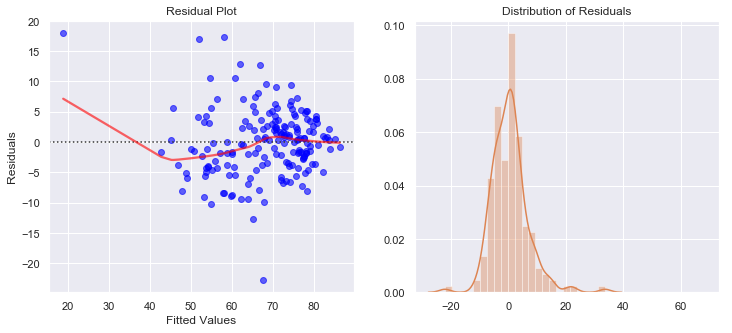

In [753]:
def residual_plots(model):
    """Function to quickly create residual plot and distribution of residuals"""

    plot, (axis_1, axis_2) = plt.subplots(ncols=2, figsize=(12, 5))

    residuals = model.resid
    fitted = model.fittedvalues
    plt_1 = sns.residplot(fitted, residuals, lowess=True, ax=axis_1,
                          scatter_kws={'color': 'blue',
                                       'alpha': .6},
                          line_kws={'color': 'red',
                                  'alpha': .6},)
    plt_1.set(title="Residual Plot", xlabel='Fitted Values',
             ylabel='Residuals')

    plt_2 = sns.distplot(residuals, ax=axis_2)
    plt_2.set(title="Distribution of Residuals")
    return

residual_plots(model_1)

In our residual plot we immediately see the scatter points make a funnel shape which indicates heteroscedasticity, or non-constant variance in our residuals.  We can also notice outliers and points with high leverage.  We can observe a bend in the residual plot on the left meaning there may be a violation of the linearity condition.  We can also see that the distribution of the residuals is fairly close to being normal.

Firstly, let's try to deal with the non-constant variance by transforming our response variable.

[Text(0.5,1,'Distribution of Life Expectancy')]

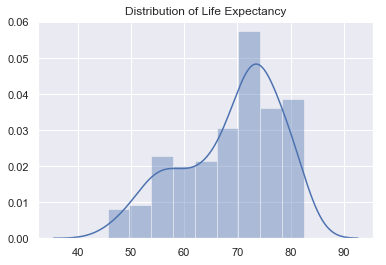

In [754]:
respose_dist = sns.distplot(data[r_vars])
respose_dist.set(title="Distribution of Life Expectancy")

We can see that the distribution of the Life Expectancy variable is skewed to the left.  We can transform this variable by taking the log(Life Expectancy) instead of Life Expectancy.

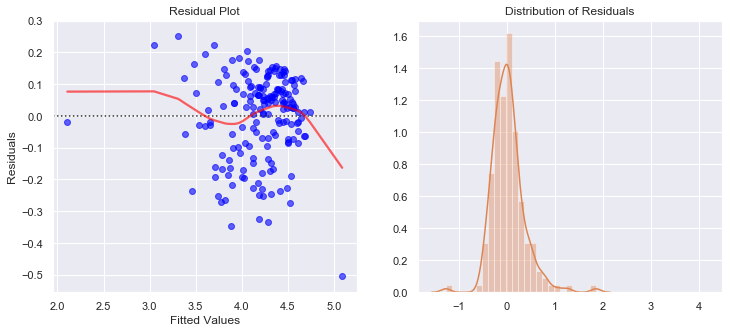

In [755]:
from math import log

data['Life Expectancy'] = data['Life Expectancy'].apply(log)

model_2 = OLS(data[r_vars], data[p_vars]).fit()
residual_plots(model_2)

Unfortunately, it looks like our first transformation didn't help much.  We can still see a funnel shape along with a slight bend in our residual plot.  Maybe it's best to deal with another one of the assumptions like multicollinearity.

We can detect multicollinearity by determining the Variance Inflation Factor (VIF) of each of the predictor variables.  The VIF measures how much the variance of $b_k$  is inflated compared to when $x_k$ is not correlated with the other predictor variables.  A VIF greater than 10 means that there are serious signs of collinearity.

In [756]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data[p_vars]
pd.Series([variance_inflation_factor(X.values, i) for i in range(len(X.columns))], 
          index=X.columns)

Status                               3.049728
Adult Mortality                     18.567299
Infant Deaths                      118.412375
Alcohol                              5.808208
Per Capita Expenditure               8.373328
Hepatitis B                         14.431244
Measles                            273.744648
Bmi                                 18.266746
Under-Five Deaths                   97.524238
Polio                              372.259139
Total Expenditure                   15.259688
Diphtheria                         284.008892
Hiv/Aids                             2.418142
Gdp                                  6.547985
Population                           1.475715
Thinness  10-19 Years               88.296260
Thinness 5-9 Years                  89.061526
Income Composition Of Resources     61.532007
Schooling                           66.696401
dtype: float64

We can see signs of serious multicollinearity with the variables with VIF > 10.  Since a simpler multiple regression model is easier to understand and work with, this gives us a good chance to remove some predictor variables.  We can determine which predictor variables to omit based on the VIF and `data[p_vars].corr()`.    

In [757]:
removed_vars = ['Under-Five Deaths', 'Infant Deaths', 'Thinness 5-9 Years',
                'Income Composition Of Resources', 'Diphtheria',
                'Per Capita Expenditure', 'Gdp', 'Population',
                'Measles', 'Adult Mortality', 'Status', 'Schooling',
                'Hepatitis B', 'Polio']

for variable in removed_vars:
    p_vars.remove(variable)

X = data[p_vars]
print(pd.Series([variance_inflation_factor(X.values, i) for i in range(len(X.columns))],
          index=X.columns))

model_3 = OLS(data[r_vars], data[p_vars]).fit()
model_3.summary()

Alcohol                  3.706733
Bmi                      6.799177
Total Expenditure        8.704074
Hiv/Aids                 1.286588
Thinness  10-19 Years    1.909167
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life Expectancy   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     950.5
Date:                Mon, 08 Apr 2019   Prob (F-statistic):          2.55e-126
Time:                        15:03:21   Log-Likelihood:                -219.46
No. Observations:                 183   AIC:                             448.9
Df Residuals:                     178   BIC:                             465.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Alcohol                   0.0284      0.021      1.378      0.170      -0.012       0.069
Bmi                       0.0537      0.004     14.097      0.000       0.046       0.061
Total Expenditure         0.1468      0.028      5.335      0.000       0.092       0.201
Hiv/Aids                  0.0212      0.014      1.483      0.140      -0.007       0.049
Thinness  10-19 Years     0.2070      0.013     15.701      0.000       0.181       0.233
==============================================================================
Omnibus:                       35.761   Durbin-Watson:                   2.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.067
Skew:                           0.685   Prob(JB):                     5.71e-29
Kurtosis:                       6.896   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We managed to remove the predictor variables with a VIF > 10 and satisfy the multicollinearity assumption. This model is looking much better.  Not only did we manage to simplify our model by removing some predictor variables, we were also able to retain a high R-squared and high F-statistic values.  We can also see that now most of the coefficients have p-value below 0.05.  We can now take another look at the residual plots.

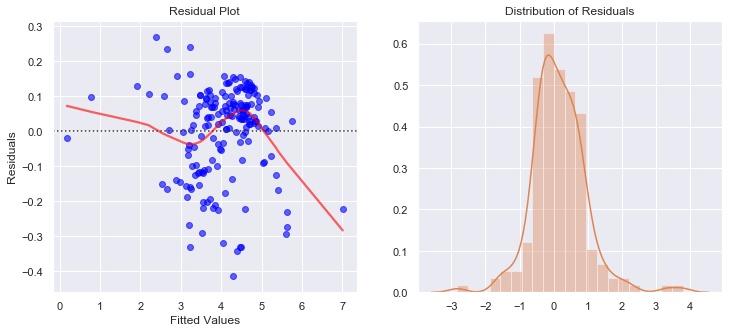

In [758]:
residual_plots(model_3)

The plots still aren't where I'd like them to be, but I'm confident that we can improve them by detecting and removing influential points.  Normally we would further investigate any influential points but for the sake of preventing this project from dragging on we'll just remove them.  An influential point means that omitting it from the analysis will give a very different regression model.  A point can be considered influential for different reasons such as:

* _Outlier_ - A point is considered an outlier if it has a y value far from the regression model or if it is 3 or more standard deviations away from the mean.  


* _High Leverage_ - A point is considered to have high leverage if its $x$-value is far from $\bar{x}$ (sample mean).


* A unique or abnormal multivariate relationship that distorts the model.

In [759]:
influence = model_3.get_influence()

infl_df = influence.summary_frame()[['cooks_d', 'student_resid']].copy()
infl_df['fitted'] = model_3.fittedvalues

p_vars.remove('Hiv/Aids')
data = data[np.abs(infl_df['student_resid']) < 3]

model_3 = OLS(data[r_vars], data[p_vars]).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life Expectancy   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1672.
Date:                Mon, 08 Apr 2019   Prob (F-statistic):          8.25e-139
Time:                        15:03:21   Log-Likelihood:                -185.15
No. Observations:                 180   AIC:                             378.3
Df Residuals:                     176   BIC:                             391.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Alcohol                   0.0417      0.017      2.396      0.018       0.007       0.076
Bmi                       0.0542      0.003     17.264      0.000       0.048       0.060
Total Expenditure         0.1204      0.023      5.219      0.000       0.075       0.166
Thinness  10-19 Years     0.2373      0.012     20.354      0.000       0.214       0.260
==============================================================================
Omnibus:                        4.501   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                5.125
Skew:                           0.170   Prob(JB):                       0.0771
Kurtosis:                       3.754   Cond. No.                         21.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

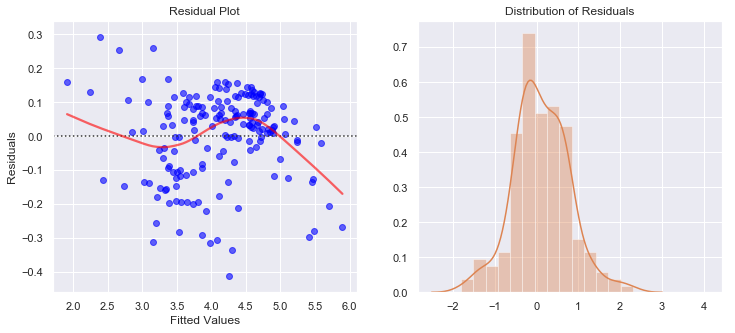

In [760]:
residual_plots(model_3)

In the residual plots we see that the data distribution is normal enough and the residuals do have a mean of 0.  The prominent funnel shape is also now gone.  All of our assumptions have been met.  Since we're not dealing with time series data we can assume that our residuals are independent of each other.  We can also see that now all of our predictor variables are significant at 0.05.

I opted to not include an intercept for this model since it doesn't seem to make sense in this context.  The intercept is meant to be a baseline for when all of the predictor variables = 0 but an average BMI of 0 is impossible and an average Total Expenditure of 0 is implausible.  Now that I have a model that I'm satisfied with, it's time to interpret the model.

* Adjusted R-squared is ~97%.  Adjusted R-squared is similar to R-squared but unlike R-squared which can only increase or stay the same when additional terms are added, Adjusted R-squared can decrease if the additional predictor variables don't improve the model fit enough.


* F-statistic is 1672, meaning that this model is useful.


* All of the independent variables have a p-value below 0.05 meaning that we can reject the null hypothesis for all of them

Our model can be written as:

$\scriptsize\widehat{log(Life\:Expectancy)} = 0.0417(Alcohol) + 0.0542(Bmi) + 0.1204(Total\: Expenditure) + 0.2373(Thinness\:10-19\:Years)$

### Project questions

*Are any of the attributes useful in explaining the Life Expectancy?*

In all of our models (attempted and final) we can see that at least one of the coefficients for the predictor variables $\neq$ 0 so at least one predictor variable is statistically significant and is useful for explaining Life Expectancy.

---
*If so, which of the attributes are useful? Are they all useful or only a subset?*

In our final model we find that Alcohol, Bmi, Total Expenditure, and Thinness 10-19 Years old provided the most useful information about Life Expectancy.  This does not mean that all of the other predictor variables are useless.  Either they were not able to give any useful information for predicting Life Expectancy or they were not able to provide any *new* information that wasn't given by a different predictor variable.  So, I would say that only a subset of variables was useful in predicting Life Expectancy in this particular project.

---
*How well does the model fit the data?*

The adjusted R-squared of the model is ~97% which, as explained above, means that this model fits the data fairly well.

---
*Can we get an estimate of the impact any useful attribute will have on Life Expectancy?*

We can get an estimate of the impact of the above variables by looking at the confidence interval of the coefficients.  In a multiple linear regression setting we can interpret the coefficients as: $\hat{y}$ will change by $b_i$ for each unit increase in $x_i$, after holding the rest of the predictor variables constant.  For example, we can say that there is a 95% probability that $\scriptsize\widehat{log(Life\:Expectancy)}$ will increase by somewhere between [0.048, 0.060] (or 0.0542 if we wanted a point estimate) for each unit increase in Bmi, after holding the other variables constant.  In order for this model to be interpretable we would have to transform our final value back into its original scale by taking the exponential of our $\scriptsize\widehat{Life\:Expectancy}$.

---

### Some final thoughts


* This model is not meant for predicting the Life Expectancy of a single new observation.  If that were the case then we would have tried to keep as much predictor variables as possible and split the data into a training and test sub-dataset in order to avoid overfitting.  We would also have to use a prediction interval instead of a confidence interval to provide an upper and lower bound for our estimate.


* Normally we would have done a more thorough job investigating the influential points.  This is so we can determine if these observations are errors or extraordinary case.  In case of the latter, those cases can actually tell us quite a bit about the data and shouldn't be discarded as easily as they were in this project.


* Many of the coefficients seem to have a counter intuitive effect on Life Expectancy (e.g. an increase in Bmi results in an increase in Life Expectancy).  This may be due to an unknown lurking variable/variables or interaction between variables.  The relationship between these variables and Life Expectancy would normally be researched more thoroughly in order to determine the cause.  An example would be:
  * Do developed countries (who traditionally have higher life expectancy) drink more alcohol than developing countries?

